# System Description
This project is to classify comments into positive and negative categories.The entire project proceeded through the following five steps:

**1.Baseline model:**

We used a simpler TFIDF-logistic regression combination as a baseline model to compare with more complex models (such as random forests, gradient boosting, etc.)

Before conducting model experiments, we need to preprocess the dataset. We deleted rows with missing values, converted ratings to categories (for example, 3.0 above are positive, 3.0 and below are negative), converted vector features, divided the dataset (80% training set and 20% test set, random_state=42), and performed SMOTE oversampling operations.


**2.Compare with different models:**

In the word embedding model, we used four word embedding models: TF-IDF, Word2Vec, Glove, and BERT; in the data analysis model, we used five classification models: logistic regression, SVM, random forest, gradient boosting tree, and decision tree. The output result indicators are combined in pairs, accuracy, F1 score, recall, and precision.


**3.Fine-tuning hyperparameters**

In this part, we start by tuning the hyperparameters in the same way for four different models, TFIDF_RF, GLOVE_SVM, BERT_RF, TFIDF_SVM. Then the optimal model was selected for testing by different methods, GridSearchCV, RandomizedSearchCV, Optuna (Bayesian), and through comparison, we finally found that TFIDF_RF+RandomizedSearchCV could get the best tuning performance.

**4.Data visualization**

In this stage, a variety of statistical and visualization techniques are employed to gain multi-faceted insights into the data and model performance. Visualization tools such as histograms, box plots, and dimensionality reduction scatter plots are used to validate measures of central tendency (mean, median, mode) and dispersion (range, variance, standard deviation, quartiles).

**5.Different ways to improve the baseline modeln**

We thought of the following methods to improve the baseline model:

1) Word vector fusion: Combine TF-IDF features with Glove.

2) Multi-model fusion: Fusion of TF-IDF - logistic regression model with other different types of classification models (support vector machine, decision tree).

3) TFIDF-XGBOOST (At first, I thought that the data set was simple and there was no need to use XGBOOST, but later I found that it also had good results).

# Environment deployment

In [ ]:
!pip install numpy==1.23.5 gensim scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but y

# 1.Baseline model (logistic regression for classifier, TF-IDF for word embedding, and accuracy and F1 for evaluation)

In [ ]:
# Visual deployment
!pip install matplotlib seaborn

Accuracy: 0.8595317725752508
F1 Score: 0.9213483146067416
Recall: 0.917910447761194
              precision    recall  f1-score   support

           0       0.33      0.35      0.34        31
           1       0.92      0.92      0.92       268

    accuracy                           0.86       299
   macro avg       0.63      0.64      0.63       299
weighted avg       0.86      0.86      0.86       299



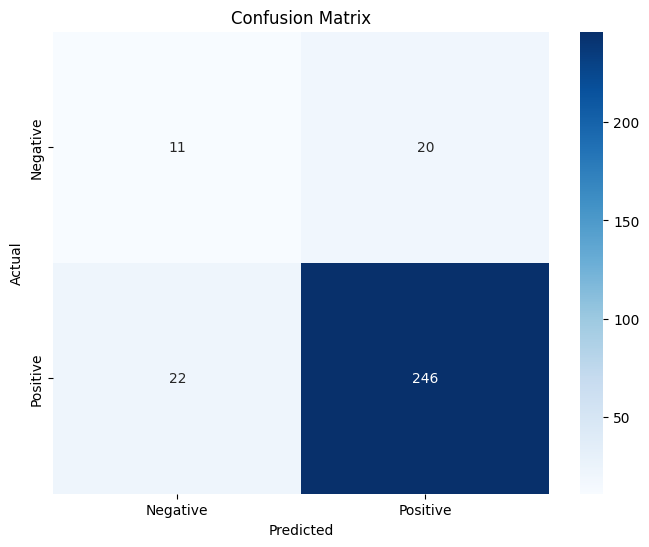

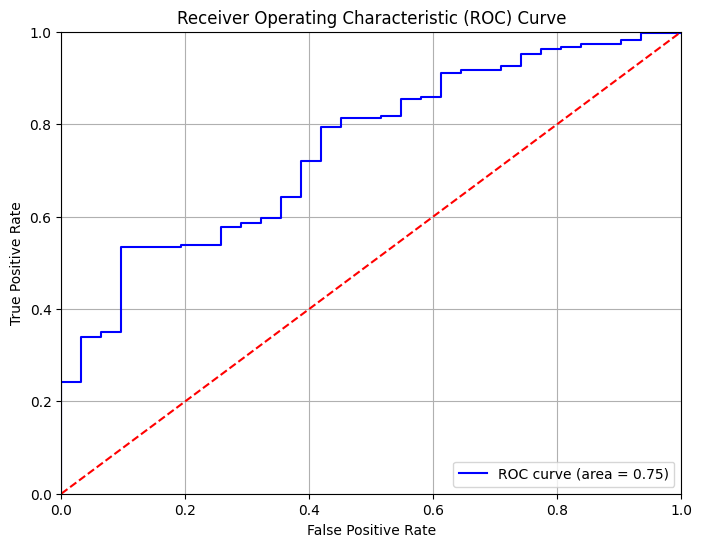

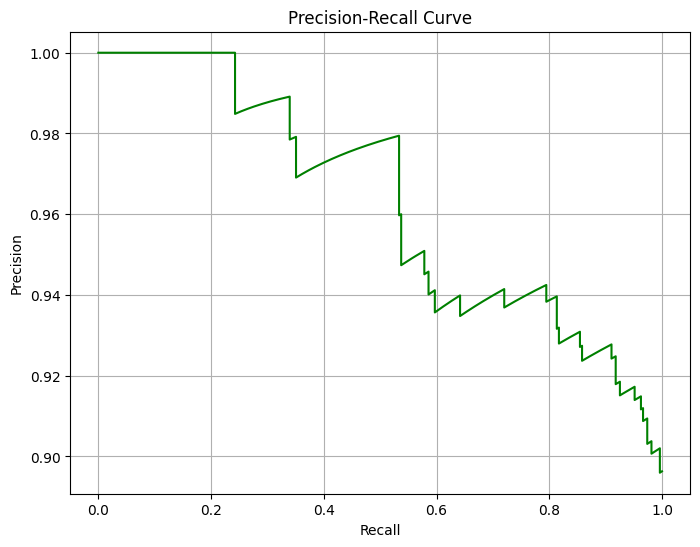

In [ ]:
#Baseline Model
#TFIDF-Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dsotm_reviews.csv')

# Handling missing values: removing rows with missing values
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extracting reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Convert the ratings to categorical (3.0 and above is positive, 3.0 and below is negative)
labels = np.where(ratings > 3.0, 1, 0)

# Use TfidfVectorizer to convert reviews into TF-IDF features
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(reviews).toarray()

# Divide the dataset(80% training set and 20% test set, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Oversampling using SMOTE(Because the positive and negative samples are unbalanced)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Classification using logistic regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred = logreg_model.predict(X_test)
y_scores = logreg_model.predict_proba(X_test)[:, 1]

# output
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plotting the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# 2. Compare with different models

## 2.1 SVM

In [ ]:
#1.TFIDF-SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dsotm_reviews.csv')

# Handling missing values: removing rows with missing values
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extracting reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Convert the ratings to categorical (3.0 and above is positive, 3.0 and below is negative)
labels = np.where(ratings > 3.0, 1, 0)

# Use TfidfVectorizer to convert reviews into TF-IDF features
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(reviews).toarray()

# Divide the dataset(80% training set and 20% test set, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Oversampling using SMOTE(Because the positive and negative samples are unbalanced)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Classification using SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_resampled, y_train_resampled)


y_pred = svm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8896321070234113
F1 Score: 0.9394495412844037
Recall: 0.9552238805970149
              precision    recall  f1-score   support

           0       0.45      0.32      0.38        31
           1       0.92      0.96      0.94       268

    accuracy                           0.89       299
   macro avg       0.69      0.64      0.66       299
weighted avg       0.88      0.89      0.88       299



In [ ]:
#2.Word2Vec-SVM   The effect is not good. The same is true on the Internet. Converting word2vec into sentence vectors and analyzing them again gives similar results.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)

# Text segmentation
tokenized_reviews = [review.lower().split() for review in reviews if isinstance(review, str)]

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Convert comments to sentence vectors
def review_to_vector(review):
    if not isinstance(review, str):
        return np.zeros(word2vec_model.vector_size)  # If it is not a string, return a zero vector
    words = review.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)  # Calculate the sentence vector as the mean of the word vector


# Convert all comments to sentence vectors
X = np.array([review_to_vector(review) for review in reviews])

# Divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Classification using SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_resampled, y_train_resampled)


y_pred = svm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.41471571906354515
F1 Score: 0.5333333333333333
Recall: 0.373134328358209
              precision    recall  f1-score   support

           0       0.12      0.77      0.22        31
           1       0.93      0.37      0.53       268

    accuracy                           0.41       299
   macro avg       0.53      0.57      0.37       299
weighted avg       0.85      0.41      0.50       299



In [ ]:
#3.GLove-SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
import numpy as np
from imblearn.over_sampling import SMOTE

def load_glove_vectors(glove_file):
    glove_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_dict[word] = vector
    return glove_dict

glove_vectors = load_glove_vectors('glove.6B.100d.txt')

data = pd.read_csv('dsotm_reviews.csv')

data.dropna(subset=['Review', 'Rating'], inplace=True)

reviews = data['Review'].values
ratings = data['Rating'].values

labels = np.where(ratings > 3.0, 1, 0)

def review_to_vector(review):
    words = review.split()
    word_vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)

X = np.array([review_to_vector(review) for review in reviews])

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

Accuracy: 0.6688963210702341
F1 Score: 0.7880085653104925
Recall: 0.6865671641791045
              precision    recall  f1-score   support

           0       0.16      0.52      0.24        31
           1       0.92      0.69      0.79       268

    accuracy                           0.67       299
   macro avg       0.54      0.60      0.52       299
weighted avg       0.85      0.67      0.73       299



**Before use BERT,we should open colab T4 GPU and install transformers.**

In [ ]:
!pip install transformers torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
#4.BERT-SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_features(reviews):
    features = []
    for review in reviews:
        inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        features.append(outputs.last_hidden_state[0][0].numpy())
    return np.array(features)


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


X = extract_features(reviews)


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Accuracy: 0.842809364548495
F1 Score: 0.9124767225325885
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        31
           1       0.91      0.91      0.91       268

    accuracy                           0.84       299
   macro avg       0.57      0.57      0.57       299
weighted avg       0.84      0.84      0.84       299



## 2.2 Random Forest

In [ ]:
# TFIDF-Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import re


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)


tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_reviews).toarray()


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8929765886287625
F1 Score: 0.9428571428571428
Recall: 0.9850746268656716
              precision    recall  f1-score   support

           0       0.43      0.10      0.16        31
           1       0.90      0.99      0.94       268

    accuracy                           0.89       299
   macro avg       0.67      0.54      0.55       299
weighted avg       0.85      0.89      0.86       299



In [ ]:
# Word2Vec-Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import re


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review.split())
    return cleaned_reviews

tokenized_reviews = preprocess_reviews(reviews)


word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)


def review_to_vector(review):
    if not isinstance(review, str):
        return np.zeros(word2vec_model.vector_size)
    words = review.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)


X = np.array([review_to_vector(review) for review in reviews])


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8294314381270903
F1 Score: 0.9050279329608939
Recall: 0.9067164179104478
              precision    recall  f1-score   support

           0       0.17      0.16      0.16        31
           1       0.90      0.91      0.91       268

    accuracy                           0.83       299
   macro avg       0.54      0.53      0.53       299
weighted avg       0.83      0.83      0.83       299



In [ ]:
# Glove-Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
import re


def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)


glove_model = load_glove_model('glove.6B.100d.txt')


def review_to_vector(review):
    if not isinstance(review, str):
        return np.zeros(100)
    words = review.split()
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)


X = np.array([review_to_vector(review) for review in cleaned_reviews])


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8494983277591973
F1 Score: 0.9171270718232044
Recall: 0.9291044776119403
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        31
           1       0.91      0.93      0.92       268

    accuracy                           0.85       299
   macro avg       0.56      0.55      0.55       299
weighted avg       0.83      0.85      0.84       299



In [ ]:
# Bert-Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch
import re


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def get_bert_embeddings(reviews):
    embeddings = []
    for review in reviews:
        inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        cls_embedding = outputs.last_hidden_state[0][0].numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)


X_bert = get_bert_embeddings(cleaned_reviews)


X_train, X_test, y_train, y_test = train_test_split(X_bert, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8695652173913043
F1 Score: 0.9299820466786356
Recall: 0.9664179104477612
              precision    recall  f1-score   support

           0       0.10      0.03      0.05        31
           1       0.90      0.97      0.93       268

    accuracy                           0.87       299
   macro avg       0.50      0.50      0.49       299
weighted avg       0.81      0.87      0.84       299



## 2.3 Logistic Regression

In [ ]:
# Word2Vec-Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import re


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review.split())
    return cleaned_reviews

tokenized_reviews = preprocess_reviews(reviews)


word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)


def review_to_vector(review):
    if not isinstance(review, str):
        return np.zeros(word2vec_model.vector_size)
    words = review.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)


X_word2vec = np.array([review_to_vector(review) for review in reviews])


X_train, X_test, y_train, y_test = train_test_split(X_word2vec, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)


y_pred = logreg_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.5217391304347826
F1 Score: 0.6603325415676959
Recall: 0.5186567164179104
              precision    recall  f1-score   support

           0       0.12      0.55      0.19        31
           1       0.91      0.52      0.66       268

    accuracy                           0.52       299
   macro avg       0.51      0.53      0.43       299
weighted avg       0.83      0.52      0.61       299



In [ ]:
# Glove-Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
import re


def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)


glove_model = load_glove_model('glove.6B.100d.txt')


def review_to_vector(review):
    if not isinstance(review, str):
        return np.zeros(100)
    words = review.split()
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)


X_glove = np.array([review_to_vector(review) for review in cleaned_reviews])


X_train, X_test, y_train, y_test = train_test_split(X_glove, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)


y_pred = logreg_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7123745819397993
F1 Score: 0.819327731092437
Recall: 0.7276119402985075
              precision    recall  f1-score   support

           0       0.20      0.58      0.30        31
           1       0.94      0.73      0.82       268

    accuracy                           0.71       299
   macro avg       0.57      0.65      0.56       299
weighted avg       0.86      0.71      0.76       299



In [ ]:
# Bert-Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch
import re


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def get_bert_embeddings(reviews):
    embeddings = []
    for review in reviews:
        inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        cls_embedding = outputs.last_hidden_state[0][0].numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)


X_bert = get_bert_embeddings(cleaned_reviews)


X_train, X_test, y_train, y_test = train_test_split(X_bert, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)


y_pred = logreg_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8060200668896321
F1 Score: 0.8884615384615384
Recall: 0.8619402985074627
              precision    recall  f1-score   support

           0       0.21      0.32      0.26        31
           1       0.92      0.86      0.89       268

    accuracy                           0.81       299
   macro avg       0.56      0.59      0.57       299
weighted avg       0.84      0.81      0.82       299



## 2.4 Gradient Boosted Trees(GBT)

In [ ]:
# TFIDF-GBT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import re


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

def extract_tfidf_features(reviews):
    tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    return tfidf_vectorizer.fit_transform(reviews).toarray()


def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    #Classification using gradient boosted trees
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_resampled, y_train_resampled)


    y_pred = gb_model.predict(X_test)


    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_tfidf = extract_tfidf_features(cleaned_reviews)

    train_and_evaluate(X_tfidf, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.8394648829431438
F1 Score: 0.9104477611940298
Recall: 0.9104477611940298
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        31
           1       0.91      0.91      0.91       268

    accuracy                           0.84       299
   macro avg       0.57      0.57      0.57       299
weighted avg       0.84      0.84      0.84       299



In [ ]:
# world2vec-GBT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import re


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

def extract_word2vec_features(reviews):
    tokenized_reviews = [review.split() for review in reviews]
    word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

    def review_to_vector(review):
        if not isinstance(review, str):
            return np.zeros(word2vec_model.vector_size)
        words = review.split()
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if len(word_vectors) == 0:
            return np.zeros(word2vec_model.vector_size)
        return np.mean(word_vectors, axis=0)

    return np.array([review_to_vector(review) for review in reviews])

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_resampled, y_train_resampled)

    y_pred = gb_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_word2vec = extract_word2vec_features(cleaned_reviews)

    train_and_evaluate(X_word2vec, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.7357859531772575
F1 Score: 0.8423153692614771
Recall: 0.7873134328358209
              precision    recall  f1-score   support

           0       0.14      0.29      0.19        31
           1       0.91      0.79      0.84       268

    accuracy                           0.74       299
   macro avg       0.52      0.54      0.51       299
weighted avg       0.83      0.74      0.77       299



In [ ]:
# Glove-GBT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
import re


def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews


def extract_glove_features(reviews, glove_file):
    glove_model = load_glove_model(glove_file)

    def review_to_glove_vector(review):
        if not isinstance(review, str):
            return np.zeros(100)  # GloVe word vector dimensions
        words = review.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if len(word_vectors) == 0:
            return np.zeros(100)
        return np.mean(word_vectors, axis=0)

    return np.array([review_to_glove_vector(review) for review in reviews])

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_resampled, y_train_resampled)

    y_pred = gb_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_glove = extract_glove_features(cleaned_reviews, 'glove.6B.100d.txt')

    train_and_evaluate(X_glove, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.7859531772575251
F1 Score: 0.8754863813229572
Recall: 0.8395522388059702
              precision    recall  f1-score   support

           0       0.19      0.32      0.24        31
           1       0.91      0.84      0.88       268

    accuracy                           0.79       299
   macro avg       0.55      0.58      0.56       299
weighted avg       0.84      0.79      0.81       299



In [ ]:
# BERT-GBT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from transformers import BertTokenizer, BertModel
import torch
from imblearn.over_sampling import SMOTE
import re

def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

# Using BERT Features
def extract_bert_features(reviews):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    embeddings = []
    for review in reviews:
        inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Get the embedding of [CLS] token
        cls_embedding = outputs.last_hidden_state[0][0].numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)


def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_resampled, y_train_resampled)

    y_pred = gb_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))

def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_bert = extract_bert_features(cleaned_reviews)

    train_and_evaluate(X_bert, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.8260869565217391
F1 Score: 0.9018867924528302
Recall: 0.8917910447761194
              precision    recall  f1-score   support

           0       0.22      0.26      0.24        31
           1       0.91      0.89      0.90       268

    accuracy                           0.83       299
   macro avg       0.56      0.57      0.57       299
weighted avg       0.84      0.83      0.83       299



## 2.5 Decision Tree

In [ ]:
# TFIDF-Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import re

def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

# Using TF-IDF features
def extract_tfidf_features(reviews):
    tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    return tfidf_vectorizer.fit_transform(reviews).toarray()

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Classification using decision trees
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled, y_train_resampled)

    y_pred = dt_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))

def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_tfidf = extract_tfidf_features(cleaned_reviews)

    train_and_evaluate(X_tfidf, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.782608695652174
F1 Score: 0.8752399232245681
Recall: 0.8507462686567164
              precision    recall  f1-score   support

           0       0.13      0.19      0.16        31
           1       0.90      0.85      0.88       268

    accuracy                           0.78       299
   macro avg       0.52      0.52      0.52       299
weighted avg       0.82      0.78      0.80       299



In [ ]:
# world2vec-Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import re


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

# Using Word2Vec features
def extract_word2vec_features(reviews):
    tokenized_reviews = [review.split() for review in reviews]
    word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

    def review_to_vector(review):
        if not isinstance(review, str):
            return np.zeros(word2vec_model.vector_size)
        words = review.split()
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if len(word_vectors) == 0:
            return np.zeros(word2vec_model.vector_size)
        return np.mean(word_vectors, axis=0)

    return np.array([review_to_vector(review) for review in reviews])

# Training and evaluating the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Use decision tree for classification
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled, y_train_resampled)

    y_pred = dt_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))

def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_word2vec = extract_word2vec_features(cleaned_reviews)

    train_and_evaluate(X_word2vec, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.7391304347826086
F1 Score: 0.8452380952380952
Recall: 0.7947761194029851
              precision    recall  f1-score   support

           0       0.13      0.26      0.17        31
           1       0.90      0.79      0.85       268

    accuracy                           0.74       299
   macro avg       0.51      0.53      0.51       299
weighted avg       0.82      0.74      0.78       299



In [ ]:
# Glove-Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
import re

# Loading GloVe word vectors
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model


def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

# Using GloVe features
def extract_glove_features(reviews, glove_file):
    glove_model = load_glove_model(glove_file)

    def review_to_glove_vector(review):
        if not isinstance(review, str):
            return np.zeros(100)  # Dimensions of GloVe word vectors
        words = review.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if len(word_vectors) == 0:
            return np.zeros(100)
        return np.mean(word_vectors, axis=0)

    return np.array([review_to_glove_vector(review) for review in reviews])

# Training and evaluating the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Use decision tree for classification
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled, y_train_resampled)

    y_pred = dt_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))

def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)


    cleaned_reviews = preprocess_reviews(reviews)


    X_glove = extract_glove_features(cleaned_reviews, 'glove.6B.100d.txt')


    train_and_evaluate(X_glove, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.7625418060200669
F1 Score: 0.8615984405458089
Recall: 0.8246268656716418
              precision    recall  f1-score   support

           0       0.13      0.23      0.16        31
           1       0.90      0.82      0.86       268

    accuracy                           0.76       299
   macro avg       0.52      0.53      0.51       299
weighted avg       0.82      0.76      0.79       299



In [ ]:
# BERT-Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from transformers import BertTokenizer, BertModel
import torch
from imblearn.over_sampling import SMOTE
import re

def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

# Using BERT Features
def extract_bert_features(reviews):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    embeddings = []
    for review in reviews:
        inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Get the embedding of [CLS] token
        cls_embedding = outputs.last_hidden_state[0][0].numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)

# Training and evaluating the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Use decision tree for classification
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled, y_train_resampled)

    y_pred = dt_model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


def main():
    data = pd.read_csv('dsotm_reviews.csv')

    data.dropna(subset=['Review', 'Rating'], inplace=True)

    reviews = data['Review'].values
    ratings = data['Rating'].values

    labels = np.where(ratings > 3.0, 1, 0)

    cleaned_reviews = preprocess_reviews(reviews)

    X_bert = extract_bert_features(cleaned_reviews)

    train_and_evaluate(X_bert, labels)

if __name__ == "__main__":
    main()

Accuracy: 0.7926421404682275
F1 Score: 0.8807692307692307
Recall: 0.8544776119402985
              precision    recall  f1-score   support

           0       0.17      0.26      0.21        31
           1       0.91      0.85      0.88       268

    accuracy                           0.79       299
   macro avg       0.54      0.56      0.54       299
weighted avg       0.83      0.79      0.81       299



## 2.6 Summary of all models

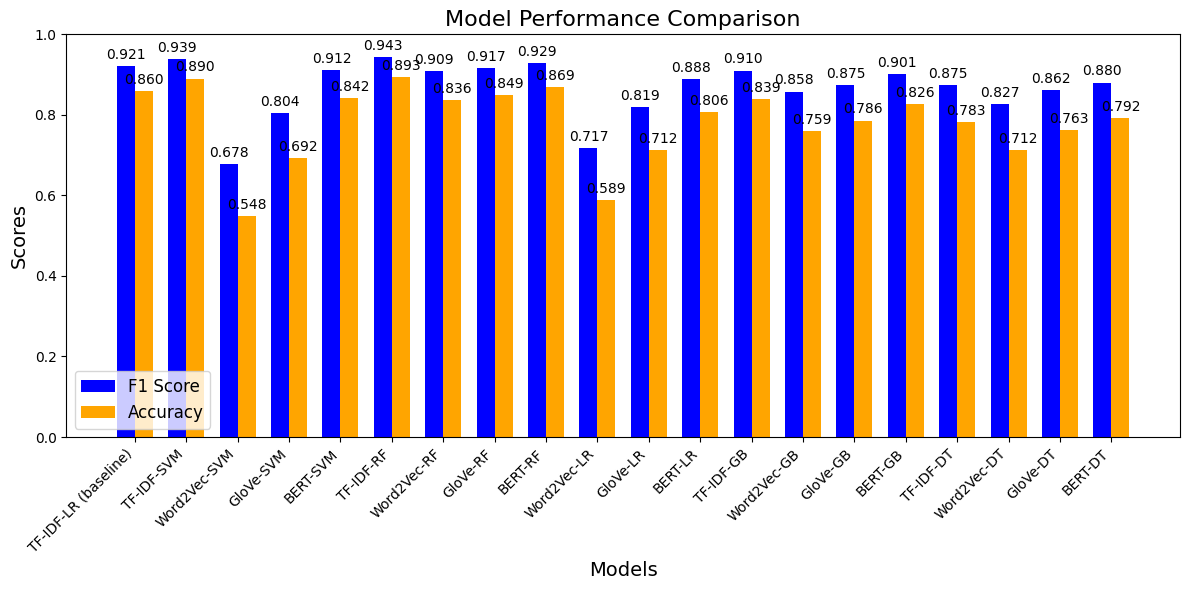

<ipython-input-1-9d4d7455583d>:196: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(model_names, rotation=45, ha='right')


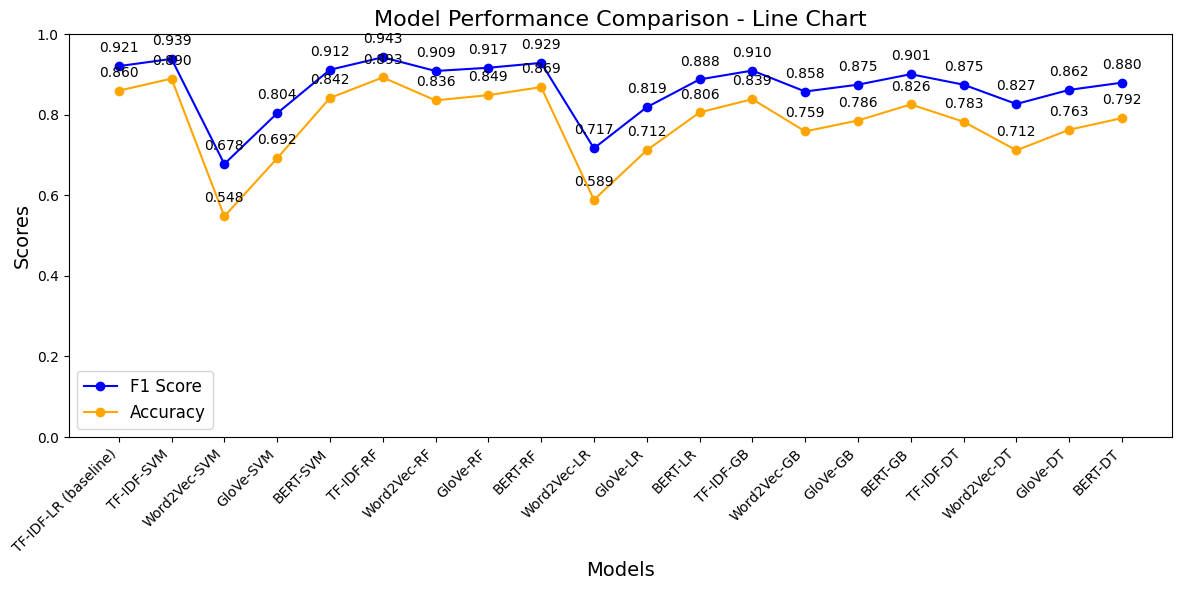

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import re

data = pd.read_csv('dsotm_reviews.csv')

# Handling missing values: removing rows with missing values
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extracting reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Convert the ratings to categorical (3.0 and above is positive, 3.0 and below is negative)
labels = np.where(ratings > 3.0, 1, 0)

def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)

# Define the model evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    return f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

# 1. TF-IDF-Random Forest
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_reviews).toarray()
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
f1_tfidf_rf, acc_tfidf_rf = evaluate_model(rf_model, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

# 2. Word2Vec-Random Forest
w2v_model = Word2Vec(sentences=[review.split() for review in cleaned_reviews], vector_size=100, window=5, min_count=1, workers=4)
X_w2v = np.array([np.mean([w2v_model.wv[word] for word in review.split() if word in w2v_model.wv] or [np.zeros(100)], axis=0) for review in cleaned_reviews])
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, labels, test_size=0.2, random_state=42)
f1_w2v_rf, acc_w2v_rf = evaluate_model(rf_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

# 3. GloVe-Random Forest
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model

glove_vectors = load_glove_model('glove.6B.100d.txt')
X_glove = np.array([np.mean([glove_vectors[word] for word in review.split() if word in glove_vectors] or [np.zeros(100)], axis=0) for review in cleaned_reviews])
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, labels, test_size=0.2, random_state=42)
f1_glove_rf, acc_glove_rf = evaluate_model(rf_model, X_train_glove, y_train_glove, X_test_glove, y_test_glove)

# Define a logistic regression model and evaluate
lr_model = LogisticRegression(max_iter=1000)

# 1. TF-IDF-Logistic Regression
f1_tfidf_lr, acc_tfidf_lr = evaluate_model(lr_model, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

# 2. Word2Vec-Logistic Regression
f1_w2v_lr, acc_w2v_lr = evaluate_model(lr_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

# 3. GloVe-Logistic Regression
f1_glove_lr, acc_glove_lr = evaluate_model(lr_model, X_train_glove, y_train_glove, X_test_glove, y_test_glove)

# Define a gradient boosted tree model and evaluate
gb_model = GradientBoostingClassifier(random_state=42)

# 1. TF-IDF-Gradient Boosting
f1_tfidf_gb, acc_tfidf_gb = evaluate_model(gb_model, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

# 2. Word2Vec-Gradient Boosting
f1_w2v_gb, acc_w2v_gb = evaluate_model(gb_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

# 3. GloVe-Gradient Boosting
f1_glove_gb, acc_glove_gb = evaluate_model(gb_model, X_train_glove, y_train_glove, X_test_glove, y_test_glove)

# Define and evaluate the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# 1. TF-IDF-Decision Tree
f1_tfidf_dt, acc_tfidf_dt = evaluate_model(dt_model, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

# 2. Word2Vec-Decision Tree
f1_w2v_dt, acc_w2v_dt = evaluate_model(dt_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

# 3. GloVe-Decision Tree
f1_glove_dt, acc_glove_dt = evaluate_model(dt_model, X_train_glove, y_train_glove, X_test_glove, y_test_glove)

# 4. SVM Model Evaluation
svm_model = SVC(kernel='linear', random_state=42)

# TF-IDF-SVM
f1_tfidf_svm, acc_tfidf_svm = evaluate_model(svm_model, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

# Word2Vec-SVM
f1_w2v_svm, acc_w2v_svm = evaluate_model(svm_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

# GloVe-SVM
f1_glove_svm, acc_glove_svm = evaluate_model(svm_model, X_train_glove, y_train_glove, X_test_glove, y_test_glove)

# Visulalization
model_names = ['TF-IDF-LR (baseline)', 'TF-IDF-SVM', 'Word2Vec-SVM', 'GloVe-SVM', 'BERT-SVM',
               'TF-IDF-RF', 'Word2Vec-RF', 'GloVe-RF', 'BERT-RF',
               'Word2Vec-LR', 'GloVe-LR', 'BERT-LR',
               'TF-IDF-GB', 'Word2Vec-GB', 'GloVe-GB', 'BERT-GB',
               'TF-IDF-DT', 'Word2Vec-DT', 'GloVe-DT', 'BERT-DT']

f1_scores = [f1_tfidf_lr, f1_tfidf_svm, f1_w2v_svm, f1_glove_svm, 0.912,
              f1_tfidf_rf, f1_w2v_rf, f1_glove_rf, 0.929,
              f1_w2v_lr, f1_glove_lr, 0.888,
              f1_tfidf_gb, f1_w2v_gb, f1_glove_gb, 0.901,
              f1_tfidf_dt, f1_w2v_dt, f1_glove_dt, 0.880]

accuracy_scores = [acc_tfidf_lr, acc_tfidf_svm, acc_w2v_svm, acc_glove_svm, 0.842,
                   acc_tfidf_rf, acc_w2v_rf, acc_glove_rf, 0.869,
                   acc_w2v_lr, acc_glove_lr, 0.806,
                   acc_tfidf_gb, acc_w2v_gb, acc_glove_gb, 0.826,
                   acc_tfidf_dt, acc_w2v_dt, acc_glove_dt, 0.792]

# Keep three decimal places
f1_scores = [round(score, 3) for score in f1_scores]
accuracy_scores = [round(score, 3) for score in accuracy_scores]


x = np.arange(len(model_names))
width = 0.35


fig, ax = plt.subplots(figsize=(12, 6))


bars1 = ax.bar(x - width / 2, f1_scores, width, label='F1 Score', color='blue')
bars2 = ax.bar(x + width / 2, accuracy_scores, width, label='Accuracy', color='orange')


ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend(fontsize=12)


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a line chart
fig2, ax2 = plt.subplots(figsize=(12, 6))


ax2.plot(model_names, f1_scores, marker='o', label='F1 Score', color='blue')
ax2.plot(model_names, accuracy_scores, marker='o', label='Accuracy', color='orange')


ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('Scores', fontsize=14)
ax2.set_title('Model Performance Comparison - Line Chart', fontsize=16)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.legend(fontsize=12)


for i in range(len(model_names)):
    ax2.annotate(f'{f1_scores[i]:.3f}', (model_names[i], f1_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ax2.annotate(f'{accuracy_scores[i]:.3f}', (model_names[i], accuracy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 3 Fine-tuning hyperparameters

In [ ]:
#TFIDF_RF
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import re
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Read the dataset
data = pd.read_csv('dsotm_reviews.csv')

data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extract reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

labels = np.where(ratings > 3.0, 1, 0)

# Text cleanup
def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)

# Use TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_reviews).toarray()

# Partition dataset (for baseline model)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_tfidf, labels, test_size=0.2, random_state=42
)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_baseline, y_train_baseline)

# Create a baseline model
rf_baseline_model = RandomForestClassifier(random_state=42)

# Train a baseline model
start_time = time()
rf_baseline_model.fit(X_train_resampled, y_train_resampled)
baseline_training_time = time() - start_time

# Evaluate a baseline model
y_pred_baseline = rf_baseline_model.predict(X_test_baseline)
print("\nBaseline model performance:")
print(f"Training time: {baseline_training_time:.2f} seconds")
print(f"Accuracy: {accuracy_score(y_test_baseline, y_pred_baseline):.4f}")
print(f"F1 Score: {f1_score(y_test_baseline, y_pred_baseline):.4f}")
print(f"Recall: {recall_score(y_test_baseline, y_pred_baseline):.4f}")
print(classification_report(y_test_baseline, y_pred_baseline, zero_division=1))

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_reviews, labels, test_size=0.2, random_state=42, stratify=labels
)

# Grid search optimization for RandomForest
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define a parameter grid
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 20],
    'classifier__min_samples_leaf': [1, 2],
}

# Create a grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nStarting grid search for hyperparameter tuning...")
start_time = time()
grid_search.fit(X_train, y_train)
grid_search_time = time() - start_time
print(f"Grid search completed in: {grid_search_time:.2f} seconds")

# Output best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized model performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best, zero_division=1))

# Compare baseline and optimized model
print("\nPerformance improvement:")
print(f"Accuracy improvement: {accuracy_score(y_test, y_pred_best) - accuracy_score(y_test_baseline, y_pred_baseline):.4f}")
print(f"F1 Score improvement: {f1_score(y_test, y_pred_best) - f1_score(y_test_baseline, y_pred_baseline):.4f}")
print(f"Recall improvement: {recall_score(y_test, y_pred_best) - recall_score(y_test_baseline, y_pred_baseline):.4f}")

# Feature importance analysis
if hasattr(best_model[-1], 'feature_importances_'):
    # Get feature names
    feature_names = best_model[0].get_feature_names_out()

    # Get feature importances
    importances = best_model[-1].feature_importances_

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Display top 20 important features
    print("\nTop 20 most important features:")
    print(feature_importance_df.head(20))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()

# Save the best model
import joblib
joblib.dump(best_model, 'best_rf_model.pkl')
print("\nBest model has been saved as 'best_rf_model.pkl'")



Baseline model performance:
Training time: 13.23 seconds
Accuracy: 0.8930
F1 Score: 0.9429
Recall: 0.9851
              precision    recall  f1-score   support

           0       0.43      0.10      0.16        31
           1       0.90      0.99      0.94       268

    accuracy                           0.89       299
   macro avg       0.67      0.54      0.55       299
weighted avg       0.85      0.89      0.86       299


Starting grid search for hyperparameter tuning...
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Grid search completed in: 54.32 seconds

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.9354

Optimized model performance:
Accuracy: 0.8829
F1 Score: 0.9372
Recall: 0.9924
              precision    recall  f1-score   support

           0       0.60      0.08      0.15        36
           1       0.89      0.99      0.9

In [ ]:
# GLOVE_SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
import numpy as np
from imblearn.over_sampling import SMOTE
import time
from joblib import dump, load
import os
import matplotlib.pyplot as plt

# Start timer
start_time = time.time()

# Load GloVe vectors (optimized: only load required vectors)
def load_glove_vectors(glove_file, dataset_words=None, limit=100000):
    print("Loading GloVe word vectors...")
    glove_dict = {}
    count = 0
    cache_file = 'glove_cache.joblib'
    if os.path.exists(cache_file):
        print("Loading GloVe vectors from cache...")
        return load(cache_file)

    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            if count >= limit:
                break
            values = line.split()
            word = values[0]
            if dataset_words is None or word in dataset_words:
                vector = np.asarray(values[1:], dtype='float32')
                glove_dict[word] = vector
            count += 1

    dump(glove_dict, cache_file)
    return glove_dict

# Load dataset
print("Reading dataset...")
data = pd.read_csv('dsotm_reviews.csv')
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extract reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Create dataset vocabulary set
dataset_words = set()
for review in reviews:
    for word in review.lower().split():
        dataset_words.add(word)
print(f"Total unique words in dataset: {len(dataset_words)}")

# Load GloVe vectors (only needed ones)
glove_vectors = load_glove_vectors('glove.6B.100d.txt', dataset_words)
print(f"Successfully loaded {len(glove_vectors)} word vectors")

# Convert ratings into binary labels
labels = np.where(ratings > 3.0, 1, 0)
print(f"Positive reviews: {sum(labels)}, Negative reviews: {len(labels) - sum(labels)}")

# Convert review to vector using GloVe
def review_to_vector(review):
    words = review.lower().split()
    word_vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)

print("Converting reviews to word vectors...")
X = np.array([review_to_vector(review) for review in reviews])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Oversampling using SMOTE
print("Applying SMOTE oversampling...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ======== Baseline Model (with SMOTE) ========
print("\n======== Training Baseline Model (with SMOTE) ========")
baseline_smote_start_time = time.time()

baseline_smote_model = SVC(kernel='linear')
baseline_smote_model.fit(X_train_resampled, y_train_resampled)

# Predictions
baseline_smote_pred = baseline_smote_model.predict(X_test)

# Evaluation
baseline_smote_accuracy = accuracy_score(y_test, baseline_smote_pred)
baseline_smote_f1 = f1_score(y_test, baseline_smote_pred)
baseline_smote_recall = recall_score(y_test, baseline_smote_pred)
baseline_smote_end_time = time.time()
baseline_smote_time = baseline_smote_end_time - baseline_smote_start_time

print("\n===== Baseline Model (with SMOTE) Evaluation =====")
print("Accuracy:", baseline_smote_accuracy)
print("F1 Score:", baseline_smote_f1)
print("Recall:", baseline_smote_recall)
print("Training Time: {:.2f} seconds".format(baseline_smote_time))
print("\nClassification Report:")
print(classification_report(y_test, baseline_smote_pred))

# ======== Hyperparameter Tuning ========
print("\n======== Starting Hyperparameter Tuning ========")
tuning_start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predictions with best model
print("Predicting with the best model...")
y_pred = best_model.predict(X_test)

# Evaluation
tuned_accuracy = accuracy_score(y_test, y_pred)
tuned_f1 = f1_score(y_test, y_pred)
tuned_recall = recall_score(y_test, y_pred)

tuning_end_time = time.time()
tuning_time = tuning_end_time - tuning_start_time

print("\n===== Tuned Model Evaluation =====")
print("Accuracy:", tuned_accuracy)
print("F1 Score:", tuned_f1)
print("Recall:", tuned_recall)
print("Training and tuning time: {:.2f} seconds".format(tuning_time))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ======== Model Comparison ========
print("\n======== Model Comparison ========")

improvement_acc = (tuned_accuracy - baseline_smote_accuracy) / baseline_smote_accuracy * 100
improvement_f1 = (tuned_f1 - baseline_smote_f1) / baseline_smote_f1 * 100
improvement_recall = (tuned_recall - baseline_smote_recall) / baseline_smote_recall * 100

print("Accuracy Comparison:")
print(f"Tuned Model: {tuned_accuracy:.4f} (Improved by: {improvement_acc:.2f}%)")

print("\nF1 Score Comparison:")
print(f"Tuned Model: {tuned_f1:.4f} (Improved by: {improvement_f1:.2f}%)")

print("\nRecall Comparison:")
print(f"Tuned Model: {tuned_recall:.4f} (Improved by: {improvement_recall:.2f}%)")

# Save the best model
dump(best_model, 'best_svm_model.joblib')
print("Best model saved as 'best_svm_model.joblib'")

# Total runtime
end_time = time.time()
print(f"\nTotal runtime: {end_time - start_time:.2f} seconds")


Reading dataset...
Total unique words in dataset: 25779
Loading GloVe word vectors...
Successfully loaded 9556 word vectors
Positive reviews: 1313, Negative reviews: 181
Converting reviews to word vectors...
Applying SMOTE oversampling...

======== Training Baseline Model (with SMOTE) ========

===== Baseline Model (with SMOTE) Evaluation =====
Accuracy: 0.6655518394648829
F1 Score: 0.7854077253218884
Recall: 0.6828358208955224
Training Time: 0.52 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.52      0.24        31
           1       0.92      0.68      0.79       268

    accuracy                           0.67       299
   macro avg       0.54      0.60      0.51       299
weighted avg       0.84      0.67      0.73       299


======== Starting Hyperparameter Tuning ========
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Predicting with th

In [ ]:
# BERT_RF
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch
import re
import time
import matplotlib.pyplot as plt
from joblib import dump

# Start timing
start_time = time.time()
print("Starting BERT-RandomForest model training and tuning...")

# Load dataset
print("Loading dataset...")
data = pd.read_csv('dsotm_reviews.csv')

# Handle missing values: drop rows with missing values
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extract reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Convert ratings to binary labels (e.g., >3.0 is positive, ≤3.0 is negative)
labels = np.where(ratings > 3.0, 1, 0)
print(f"Positive reviews: {sum(labels)}, Negative reviews: {len(labels) - sum(labels)}")

# Text preprocessing
def preprocess_reviews(reviews):
    print("Cleaning and preprocessing text...")
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())  # Remove special characters
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)

# Load BERT model and tokenizer
print("Loading BERT model and tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Convert reviews to BERT embeddings
def get_bert_embeddings(reviews, batch_size=32):
    print("Generating BERT embeddings...")
    embeddings = []
    total = len(reviews)

    for i in range(0, total, batch_size):
        batch = reviews[i:min(i+batch_size, total)]
        batch_embeddings = []

        for review in batch:
            inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True, max_length=128)
            with torch.no_grad():
                outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[0][0].numpy()
            batch_embeddings.append(cls_embedding)

        embeddings.extend(batch_embeddings)
        if (i + batch_size) % (batch_size * 10) == 0 or (i + batch_size) >= total:
            print(f"Processed {min(i+batch_size, total)}/{total} reviews")

    return np.array(embeddings)

# Get BERT embeddings for all reviews
X_bert = get_bert_embeddings(cleaned_reviews)
print(f"BERT embedding shape: {X_bert.shape}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_bert, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Apply SMOTE
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set size: {X_train_resampled.shape}")

# ======== Baseline Model (with SMOTE) ========
print("\n======== Training baseline Random Forest model (with SMOTE) ========")
baseline_start_time = time.time()

baseline_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
baseline_rf.fit(X_train_resampled, y_train_resampled)

baseline_pred = baseline_rf.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)

baseline_end_time = time.time()
baseline_time = baseline_end_time - baseline_start_time

print("\n===== Baseline Random Forest Evaluation =====")
print("Accuracy:", baseline_accuracy)
print("F1 Score:", baseline_f1)
print("Recall:", baseline_recall)
print("Training Time: {:.2f} seconds".format(baseline_time))
print("\nClassification Report (Baseline):")
print(classification_report(y_test, baseline_pred, zero_division=1))

# ======== Hyperparameter Tuning ========
print("\n======== Starting Random Forest hyperparameter tuning ========")
tuning_start_time = time.time()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("Predicting on test set with best model...")
tuned_pred = best_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, tuned_pred)
tuned_f1 = f1_score(y_test, tuned_pred)
tuned_recall = recall_score(y_test, tuned_pred)

tuning_end_time = time.time()
tuning_time = tuning_end_time - tuning_start_time

print("\n===== Tuned Random Forest Evaluation =====")
print("Accuracy:", tuned_accuracy)
print("F1 Score:", tuned_f1)
print("Recall:", tuned_recall)
print("Training and Tuning Time: {:.2f} seconds".format(tuning_time))
print("\nClassification Report (Tuned):")
print(classification_report(y_test, tuned_pred, zero_division=1))

# ======== Model Comparison ========
print("\n======== Model Comparison ========")

improvement_acc = (tuned_accuracy - baseline_accuracy) / baseline_accuracy * 100
improvement_f1 = (tuned_f1 - baseline_f1) / baseline_f1 * 100
improvement_recall = (tuned_recall - baseline_recall) / baseline_recall * 100

print("Model Comparison:")
print(f"Baseline (with SMOTE): Accuracy={baseline_accuracy:.4f}, F1={baseline_f1:.4f}, Recall={baseline_recall:.4f}")
print(f"Tuned Model: Accuracy={tuned_accuracy:.4f}, F1={tuned_f1:.4f}, Recall={tuned_recall:.4f}")
print(f"Performance Improvement: Accuracy +{improvement_acc:.2f}%, F1 +{improvement_f1:.2f}%, Recall +{improvement_recall:.2f}%")

# Feature Importance Analysis
print("\n======== Feature Importance Analysis ========")
feature_importances = best_model.feature_importances_
top_indices = np.argsort(feature_importances)[-20:]

print("Top 20 Most Important BERT Feature Dimensions:")
for i, idx in enumerate(reversed(top_indices)):
    print(f"Feature Dimension {idx}: Importance {feature_importances[idx]:.6f}")

# Save the best model
dump(best_model, 'best_bert_rf_model.joblib')
print("Best model saved as 'best_bert_rf_model.joblib'")

# Total runtime
end_time = time.time()
print(f"\nTotal Runtime: {end_time - start_time:.2f} seconds")


Starting BERT-RandomForest model training and tuning...
Loading dataset...
Positive reviews: 1313, Negative reviews: 181
Cleaning and preprocessing text...
Loading BERT model and tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating BERT embeddings...
Processed 320/1494 reviews
Processed 640/1494 reviews
Processed 960/1494 reviews
Processed 1280/1494 reviews
Processed 1494/1494 reviews
BERT embedding shape: (1494, 768)
Training set size: (1195, 768), Test set size: (299, 768)
Applying SMOTE...
Resampled training set size: (2090, 768)

======== Training baseline Random Forest model (with SMOTE) ========

===== Baseline Random Forest Evaluation =====
Accuracy: 0.8729096989966555
F1 Score: 0.931899641577061
Recall: 0.9701492537313433
Training Time: 9.89 seconds

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.11      0.03      0.05        31
           1       0.90      0.97      0.93       268

    accuracy                           0.87       299
   macro avg       0.50      0.50      0.49       299
weighted avg       0.82      0.87      0.84       299


======== Starting Random Forest hyperparameter tuning ========
Fitting 3 folds for each of

In [ ]:
# TFIDF_SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from imblearn.over_sampling import SMOTE
import time
import matplotlib.pyplot as plt
from joblib import dump

# Start timing
start_time = time.time()
print("Starting data processing and model training...")

# Read dataset
print("Reading dataset...")
data = pd.read_csv('dsotm_reviews.csv')

# Handle missing values: drop rows with missing review or rating
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extract reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values

# Convert ratings to binary labels (e.g., above 3.0 is positive, 3.0 and below is negative)
labels = np.where(ratings > 3.0, 1, 0)
print(f"Positive reviews: {sum(labels)}, Negative reviews: {len(labels) - sum(labels)}")

# Convert text data to TF-IDF features
print("Vectorizing text data with TF-IDF...")
# Add additional TF-IDF parameters for tuning
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
)
X = vectorizer.fit_transform(reviews)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Use SMOTE for oversampling
print("Applying SMOTE for oversampling...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set size: {X_train_resampled.shape}")

# ======== Baseline model (with SMOTE) ========
print("\n======== Training baseline model (with SMOTE) ========")
baseline_smote_start_time = time.time()

# Train default SVM model with SMOTE
baseline_smote_model = SVC(kernel='linear')
baseline_smote_model.fit(X_train_resampled, y_train_resampled)

# Predict using baseline model
baseline_smote_pred = baseline_smote_model.predict(X_test)

# Evaluate baseline model
baseline_smote_accuracy = accuracy_score(y_test, baseline_smote_pred)
baseline_smote_f1 = f1_score(y_test, baseline_smote_pred)
baseline_smote_recall = recall_score(y_test, baseline_smote_pred)

baseline_smote_end_time = time.time()
baseline_smote_time = baseline_smote_end_time - baseline_smote_start_time

print("\n===== Baseline model (with SMOTE) evaluation results =====")
print("Accuracy:", baseline_smote_accuracy)
print("F1 Score:", baseline_smote_f1)
print("Recall:", baseline_smote_recall)
print("Training time: {:.2f} seconds".format(baseline_smote_time))
print("\nClassification report for baseline model (with SMOTE):")
print(classification_report(y_test, baseline_smote_pred))

# ======== Hyperparameter tuning ========
print("\n======== Starting hyperparameter tuning for TF-IDF and SVM ========")
tuning_start_time = time.time()

# Parameter grid - only tuning SVM, TF-IDF is already set
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'class_weight': ['balanced', None]
}

# Use fewer cross-validation folds to improve speed
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,  # reduce folds
    scoring='f1',
    n_jobs=-1,  # use all CPUs
    verbose=1
)

# Train with SMOTE-resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("\nBest parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict with best model
print("Predicting on test set with best model...")
tuned_pred = best_model.predict(X_test)

# Output evaluation metrics
tuned_accuracy = accuracy_score(y_test, tuned_pred)
tuned_f1 = f1_score(y_test, tuned_pred)
tuned_recall = recall_score(y_test, tuned_pred)

tuning_end_time = time.time()
tuning_time = tuning_end_time - tuning_start_time

print("\n===== Tuned model evaluation results =====")
print("Accuracy:", tuned_accuracy)
print("F1 Score:", tuned_f1)
print("Recall:", tuned_recall)
print("Training and tuning time: {:.2f} seconds".format(tuning_time))
print("\nClassification report for tuned model:")
print(classification_report(y_test, tuned_pred))

# ======== Model comparison and visualization ========
print("\n======== Model comparison ========")

# Show model performance and improvement percentages
improvement_acc = (tuned_accuracy - baseline_smote_accuracy) / baseline_smote_accuracy * 100
improvement_f1 = (tuned_f1 - baseline_smote_f1) / baseline_smote_f1 * 100
improvement_recall = (tuned_recall - baseline_smote_recall) / baseline_smote_recall * 100

print("Model Comparison - Accuracy:")
print(f"Baseline (with SMOTE): {baseline_smote_accuracy:.4f}")
print(f"Tuned model: {tuned_accuracy:.4f} (Improvement: {improvement_acc:.2f}%)")

print("\nModel Comparison - F1 Score:")
print(f"Baseline (with SMOTE): {baseline_smote_f1:.4f}")
print(f"Tuned model: {tuned_f1:.4f} (Improvement: {improvement_f1:.2f}%)")

print("\nModel Comparison - Recall:")
print(f"Baseline (with SMOTE): {baseline_smote_recall:.4f}")
print(f"Tuned model: {tuned_recall:.4f} (Improvement: {improvement_recall:.2f}%)")

# Save the best model and vectorizer
dump(best_model, 'best_tfidf_svm_model.joblib')
dump(vectorizer, 'tfidf_vectorizer.joblib')
print("Best model saved as 'best_tfidf_svm_model.joblib'")
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.joblib'")

# Print feature importance analysis (for linear kernel only)
if best_model.kernel == 'linear':
    print("\n======== Feature Importance Analysis ========")
    # Show top 15 important features
    feature_names = vectorizer.get_feature_names_out()
    coefs = best_model.coef_.toarray() if hasattr(best_model.coef_, 'toarray') else best_model.coef_
    coefs = coefs[0]

    # Get most positive and negative contributing features
    top_positive_idx = np.argsort(coefs)[-15:]
    top_negative_idx = np.argsort(coefs)[:15]

    print("Top features for positive sentiment:")
    for idx in reversed(top_positive_idx):
        print(f"{feature_names[idx]}: {coefs[idx]:.4f}")

    print("\nTop features for negative sentiment:")
    for idx in top_negative_idx:
        print(f"{feature_names[idx]}: {coefs[idx]:.4f}")

# Print total runtime
end_time = time.time()
print(f"\nTotal runtime: {end_time - start_time:.2f} seconds")


开始BERT-RandomForest模型训练与调优...
读取数据集...
积极评论: 1313, 消极评论: 181
清理和预处理文本...
加载BERT模型和tokenizer...
使用BERT生成文本嵌入向量...
已处理 320/1494 条评论
已处理 640/1494 条评论
已处理 960/1494 条评论
已处理 1280/1494 条评论
已处理 1494/1494 条评论
BERT嵌入维度: (1494, 768)
训练集大小: (1195, 768), 测试集大小: (299, 768)
使用SMOTE进行过采样...
重采样后训练集大小: (2090, 768)

======== 训练基线随机森林模型 (使用SMOTE) ========

===== 基线随机森林模型评估结果 =====
准确率 (Accuracy): 0.8729096989966555
F1 分数: 0.931899641577061
召回率 (Recall): 0.9701492537313433
训练时间: 7.46 秒

基线模型分类报告:
              precision    recall  f1-score   support

           0       0.11      0.03      0.05        31
           1       0.90      0.97      0.93       268

    accuracy                           0.87       299
   macro avg       0.50      0.50      0.49       299
weighted avg       0.82      0.87      0.84       299


======== 开始随机森林超参数调优 ========
Fitting 3 folds for each of 162 candidates, totalling 486 fits

最佳参数: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_

Loading and preprocessing data...

1. Starting GridSearchCV hyperparameter tuning...
Fitting 3 folds for each of 96 candidates, totalling 288 fits
GridSearchCV completed in: 15.42 seconds
Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.9367

GridSearchCV model performance:
Accuracy: 0.8763
F1 Score: 0.9331
Recall: 0.9810
              precision    recall  f1-score   support

           0       0.44      0.11      0.18        36
           1       0.89      0.98      0.93       263

    accuracy                           0.88       299
   macro avg       0.67      0.55      0.56       299
weighted avg       0.84      0.88      0.84       299


2. Starting RandomizedSearchCV hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[I 2025-04-14 09:41:04,836] A new study created in memory with name: no-name-2bd481ed-c0fa-48ac-bde4-6508841ae69e


RandomizedSearchCV completed in: 70.66 seconds
Best parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 99, 'tfidf__max_features': 8943, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.9347

RandomizedSearchCV model performance:
Accuracy: 0.8829
F1 Score: 0.9374
Recall: 0.9962
              precision    recall  f1-score   support

           0       0.67      0.06      0.10        36
           1       0.89      1.00      0.94       263

    accuracy                           0.88       299
   macro avg       0.78      0.53      0.52       299
weighted avg       0.86      0.88      0.84       299


3. Starting Bayesian Optimization (Optuna) hyperparameter tuning...


[I 2025-04-14 09:41:05,359] Trial 7 finished with value: 0.9252913275613692 and parameters: {'ngram_index': 1, 'tfidf__max_features': 14750, 'n_estimators': 59, 'use_max_depth': False, 'min_samples_leaf': 5, 'min_samples_split': 9, 'max_features': 'log2'}. Best is trial 7 with value: 0.9252913275613692.
[I 2025-04-14 09:41:05,465] Trial 3 finished with value: 0.9311747287268473 and parameters: {'ngram_index': 0, 'tfidf__max_features': 15826, 'n_estimators': 150, 'use_max_depth': True, 'max_depth': 24, 'min_samples_leaf': 4, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.9311747287268473.
[I 2025-04-14 09:41:05,649] Trial 4 finished with value: 0.9338688181922588 and parameters: {'ngram_index': 2, 'tfidf__max_features': 17039, 'n_estimators': 129, 'use_max_depth': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 4 with value: 0.9338688181922588.
[I 2025-04-14 09:41:06,210] Trial 0 finished with 

Optuna Optimization completed in: 25.09 seconds
Best parameters: {'ngram_index': 0, 'tfidf__max_features': 16260, 'n_estimators': 265, 'use_max_depth': False, 'min_samples_leaf': 1, 'min_samples_split': 9, 'max_features': 'log2'}
Best trial score: 0.9356

Optuna model performance:
Accuracy: 0.8696
F1 Score: 0.9302
Recall: 0.9886
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.88      0.99      0.93       263

    accuracy                           0.87       299
   macro avg       0.44      0.49      0.47       299
weighted avg       0.77      0.87      0.82       299


===== Comparison of Hyperparameter Tuning Methods =====
               Method  Training Time (s)  F1 Score  Accuracy    Recall
0        GridSearchCV          15.415776  0.933092  0.876254  0.980989
1  RandomizedSearchCV          70.660297  0.937388  0.882943  0.996198
2   Optuna (Bayesian)          25.087866  0.930233  0.869565  0.988593


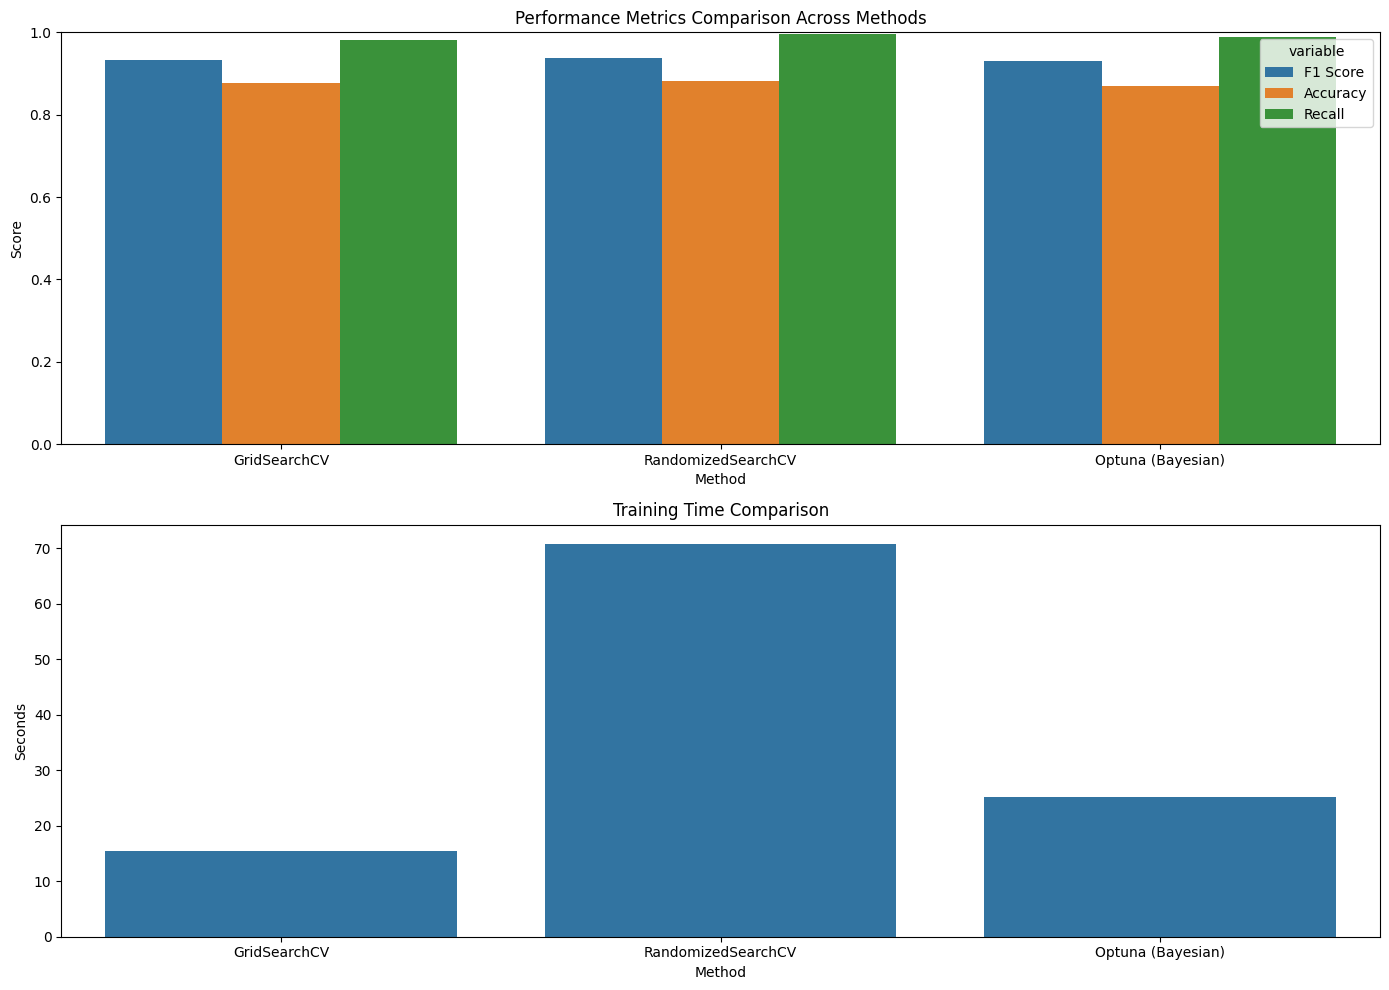


The best performing method was: RandomizedSearchCV

Top 20 most important features from the best model:
          Feature  Importance
1910       doesnt    0.007251
8613         wish    0.006203
940        better    0.005058
7691        sorry    0.004638
6071  piper gates    0.004131
433       amazing    0.004085
1071       boring    0.004016
6372     probably    0.003729
4479       meddle    0.003637
896          best    0.003606
7946  syd barrett    0.003402
2865         hard    0.003331
371    album time    0.003280
2714         good    0.003272
2647    generally    0.003259
6066         pink    0.003236
6322       pretty    0.003224
1797        depth    0.003146
7748      special    0.003097
1905         does    0.003074


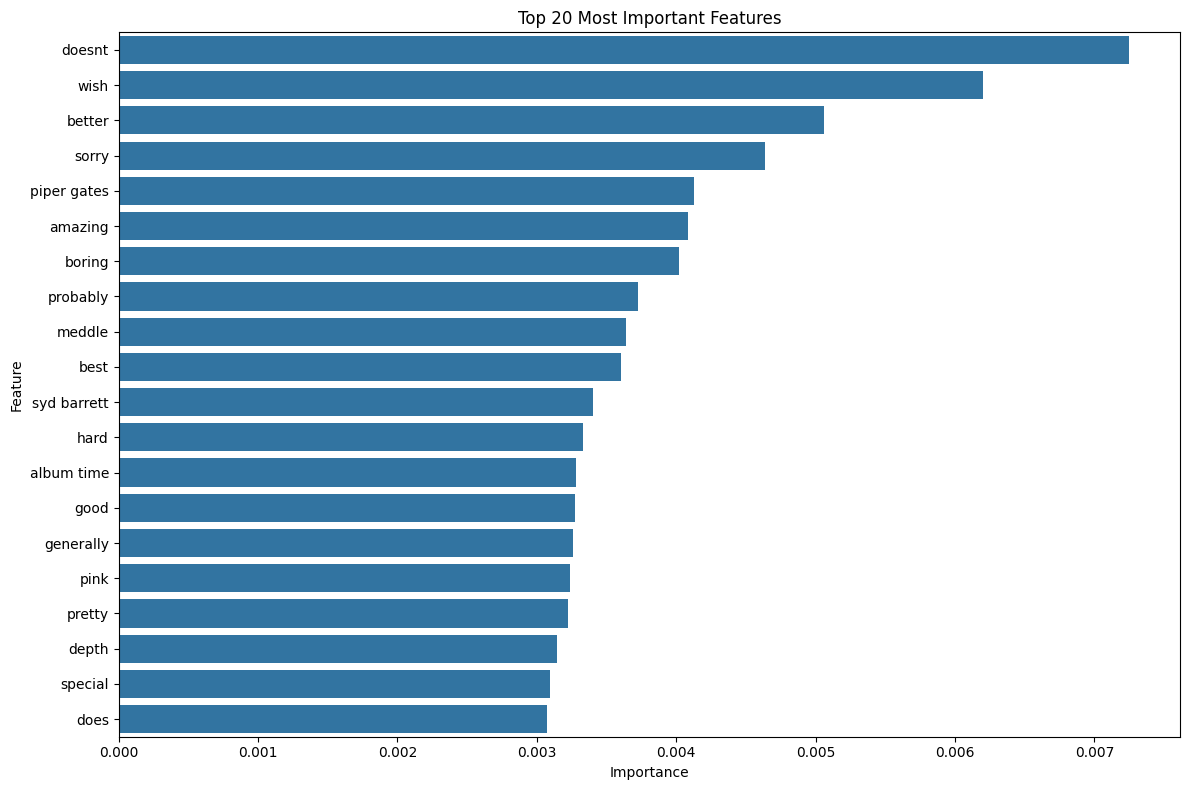


Best overall model (RandomizedSearchCV) has been saved as 'best_overall_model.pkl'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import re
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import optuna
import joblib
from scipy.stats import randint, uniform

# Read the dataset
print("Loading and preprocessing data...")
data = pd.read_csv('dsotm_reviews.csv')
data.dropna(subset=['Review', 'Rating'], inplace=True)

# Extract reviews and ratings
reviews = data['Review'].values
ratings = data['Rating'].values
labels = np.where(ratings > 3.0, 1, 0)

# Text cleanup
def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(reviews)

# Split data - we'll use the same split for all methods to ensure fair comparison
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_reviews, labels, test_size=0.2, random_state=42, stratify=labels
)

# Define the pipeline template for all methods
def create_pipeline():
    return ImbPipeline([
        ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

# =================== Method 1: GridSearchCV ===================
print("\n1. Starting GridSearchCV hyperparameter tuning...")
pipeline_grid = create_pipeline()

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [5000, 10000],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 20, 30],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    pipeline_grid,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time()
grid_search.fit(X_train, y_train)
grid_time = time() - start_time

print(f"GridSearchCV completed in: {grid_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the model
y_pred_grid = grid_search.predict(X_test)
grid_accuracy = accuracy_score(y_test, y_pred_grid)
grid_f1 = f1_score(y_test, y_pred_grid)
grid_recall = recall_score(y_test, y_pred_grid)

print("\nGridSearchCV model performance:")
print(f"Accuracy: {grid_accuracy:.4f}")
print(f"F1 Score: {grid_f1:.4f}")
print(f"Recall: {grid_recall:.4f}")
print(classification_report(y_test, y_pred_grid, zero_division=1))

# Save model
joblib.dump(grid_search.best_estimator_, 'best_grid_model.pkl')

# =================== Method 2: RandomizedSearchCV ===================
print("\n2. Starting RandomizedSearchCV hyperparameter tuning...")
pipeline_random = create_pipeline()

param_dist = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_features': randint(5000, 20000),
    'classifier__n_estimators': randint(50, 300),
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    pipeline_random,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

start_time = time()
random_search.fit(X_train, y_train)
random_time = time() - start_time

print(f"RandomizedSearchCV completed in: {random_time:.2f} seconds")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# Evaluate the model
y_pred_random = random_search.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_random)
random_f1 = f1_score(y_test, y_pred_random)
random_recall = recall_score(y_test, y_pred_random)

print("\nRandomizedSearchCV model performance:")
print(f"Accuracy: {random_accuracy:.4f}")
print(f"F1 Score: {random_f1:.4f}")
print(f"Recall: {random_recall:.4f}")
print(classification_report(y_test, y_pred_random, zero_division=1))

# Save model
joblib.dump(random_search.best_estimator_, 'best_random_model.pkl')

# =================== Method 3: Bayesian Optimization (Optuna) ===================
print("\n3. Starting Bayesian Optimization (Optuna) hyperparameter tuning...")

def objective(trial):
    # Define the hyperparameter search space
    ngram_range_options = [(1, 1), (1, 2), (1, 3)]
    ngram_index = trial.suggest_int('ngram_index', 0, len(ngram_range_options)-1)

    tfidf_params = {
        'lowercase': True,
        'stop_words': 'english',
        'ngram_range': ngram_range_options[ngram_index],
        'max_features': trial.suggest_int('tfidf__max_features', 5000, 20000)
    }

    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 50) if trial.suggest_categorical('use_max_depth', [True, False]) else None,
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }

    # Create the pipeline
    pipeline = ImbPipeline([
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(**rf_params))
    ])

    # Use cross-validation for evaluation
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
    return scores.mean()

# Create and run the study
study = optuna.create_study(direction='maximize')
start_time = time()
study.optimize(objective, n_trials=20, n_jobs=-1)
optuna_time = time() - start_time

print(f"Optuna Optimization completed in: {optuna_time:.2f} seconds")
print(f"Best parameters: {study.best_params}")
print(f"Best trial score: {study.best_value:.4f}")

# Get the best parameters from Optuna
best_params = study.best_params
ngram_range_options = [(1, 1), (1, 2), (1, 3)]
ngram_range = ngram_range_options[best_params['ngram_index']]

# Create the best model from Optuna
best_tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=ngram_range,
    max_features=best_params['tfidf__max_features']
)

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'] if best_params['use_max_depth'] else None,
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    max_features=best_params['max_features'],
    random_state=42
)

best_optuna_pipeline = ImbPipeline([
    ('tfidf', best_tfidf),
    ('smote', SMOTE(random_state=42)),
    ('classifier', best_rf)
])

# Train the best model
best_optuna_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_optuna = best_optuna_pipeline.predict(X_test)
optuna_accuracy = accuracy_score(y_test, y_pred_optuna)
optuna_f1 = f1_score(y_test, y_pred_optuna)
optuna_recall = recall_score(y_test, y_pred_optuna)

print("\nOptuna model performance:")
print(f"Accuracy: {optuna_accuracy:.4f}")
print(f"F1 Score: {optuna_f1:.4f}")
print(f"Recall: {optuna_recall:.4f}")
print(classification_report(y_test, y_pred_optuna, zero_division=1))

# Save model
joblib.dump(best_optuna_pipeline, 'best_optuna_model.pkl')

# =================== Results Comparison ===================
print("\n===== Comparison of Hyperparameter Tuning Methods =====")

results = pd.DataFrame({
    'Method': ['GridSearchCV', 'RandomizedSearchCV', 'Optuna (Bayesian)'],
    'Training Time (s)': [grid_time, random_time, optuna_time],
    'F1 Score': [grid_f1, random_f1, optuna_f1],
    'Accuracy': [grid_accuracy, random_accuracy, optuna_accuracy],
    'Recall': [grid_recall, random_recall, optuna_recall]
})

print(results)

# Visualize the comparison
plt.figure(figsize=(14, 10))

# Performance metrics comparison
plt.subplot(2, 1, 1)
metrics_df = pd.melt(results, id_vars=['Method'], value_vars=['F1 Score', 'Accuracy', 'Recall'])
sns.barplot(x='Method', y='value', hue='variable', data=metrics_df)
plt.title('Performance Metrics Comparison Across Methods')
plt.ylabel('Score')
plt.ylim(0, 1)

# Training time comparison
plt.subplot(2, 1, 2)
sns.barplot(x='Method', y='Training Time (s)', data=results)
plt.title('Training Time Comparison')
plt.ylabel('Seconds')

plt.tight_layout()
plt.savefig('hyperparameter_tuning_comparison.png')
plt.show()

# Feature importance analysis for the best model overall
best_method_idx = results['F1 Score'].idxmax()
best_method = results.iloc[best_method_idx]['Method']
print(f"\nThe best performing method was: {best_method}")

if best_method == 'GridSearchCV':
    best_model_overall = grid_search.best_estimator_
elif best_method == 'RandomizedSearchCV':
    best_model_overall = random_search.best_estimator_
else:
    best_model_overall = best_optuna_pipeline

# Feature importance analysis
if hasattr(best_model_overall[-1], 'feature_importances_'):
    # Get feature names
    feature_names = best_model_overall[0].get_feature_names_out()

    # Get feature importances
    importances = best_model_overall[-1].feature_importances_

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Display top 20 important features
    print("\nTop 20 most important features from the best model:")
    print(feature_importance_df.head(20))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.savefig('best_model_feature_importance.png')
    plt.show()

# Save the best overall model
joblib.dump(best_model_overall, 'best_overall_model.pkl')
print(f"\nBest overall model ({best_method}) has been saved as 'best_overall_model.pkl'")

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 22.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



# 4 Data Visualization

In [ ]:
import pandas as pd

data = pd.read_csv('dsotm_reviews.csv')

In [ ]:
data.dropna(subset=['Review', 'Rating'], inplace=True)
print(data.shape)
print(data.head())

(1494, 2)
                                              Review  Rating
0  "More has been said about Dark Side of the Moo...     4.5
1  What can I possibly say about an album that no...     5.0
2  You know for a band that spent several albums ...     2.0
3            Has finally clicked with me in full ...     4.0
4            So why are people afraid to say this...     4.5


In [ ]:
print(data['Rating'].describe())

count    1494.000000
mean        4.393574
std         0.971661
min         0.500000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


In [ ]:
mode_rating = data['Rating'].mode()[0]
variance_rating = data['Rating'].var()
range_rating = data['Rating'].max() - data['Rating'].min()
print(f"Mode: {mode_rating}, Variance: {variance_rating}, Range: {range_rating}")

Mode: 5.0, Variance: 0.9441247911942359, Range: 4.5


count    1494.000000
mean      137.771754
std       288.387553
min         1.000000
25%        19.250000
50%        51.000000
75%       146.000000
max      5678.000000
Name: Review_length, dtype: float64


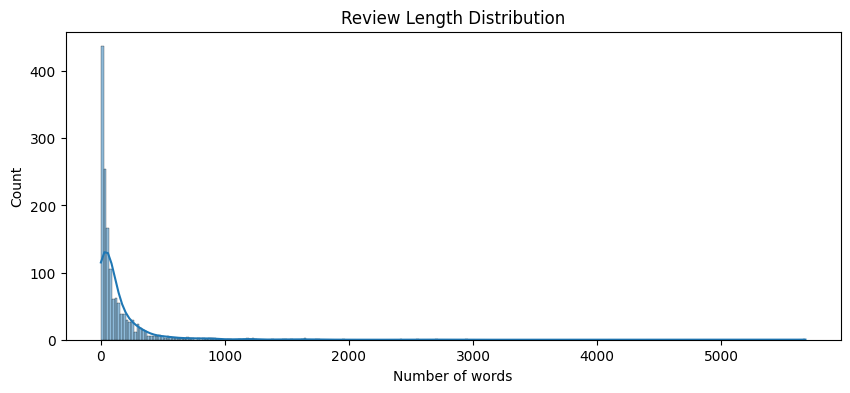

In [ ]:
data['Review_length'] = data['Review'].apply(lambda x: len(x.split()))
print(data['Review_length'].describe())

plt.figure(figsize=(10, 4))
sns.histplot(data['Review_length'], kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of words")
plt.show()

In [ ]:
from collections import Counter
import re

all_words = " ".join(data['Review']).lower()
words = re.findall(r'\b\w+\b', all_words)
word_counts = Counter(words)

print(word_counts.most_common(10))

[('the', 11363), ('of', 5559), ('and', 5205), ('to', 4485), ('a', 4305), ('is', 3737), ('it', 3266), ('i', 3097), ('album', 3089), ('this', 2958)]


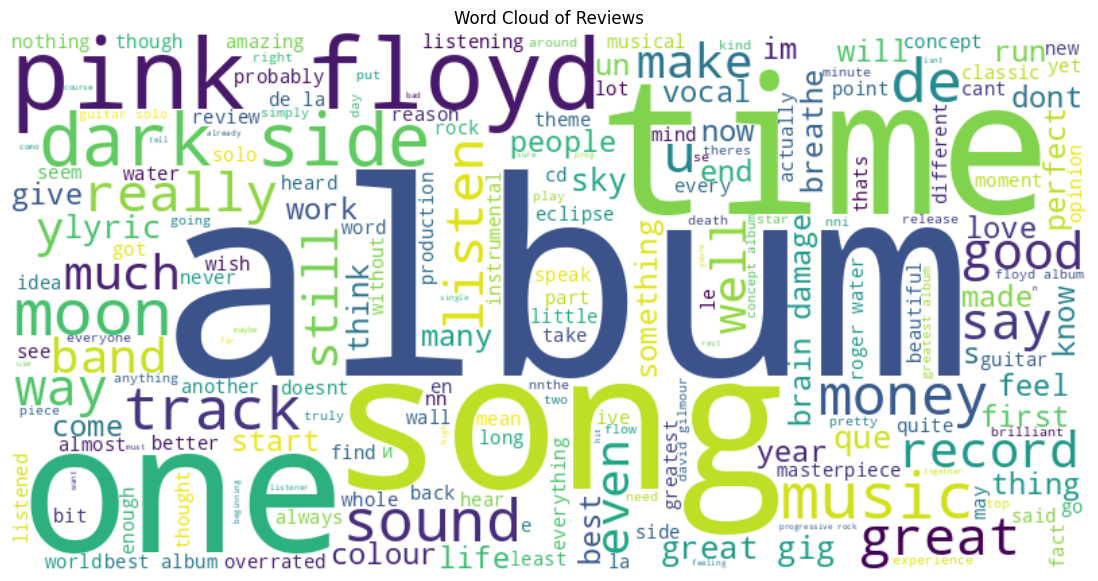

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

In [ ]:
import re

def preprocess_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\W', ' ', review.lower())
        cleaned_reviews.append(review)
    return cleaned_reviews

cleaned_reviews = preprocess_reviews(data['Review'].values)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(cleaned_reviews).toarray()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

labels = np.where(data['Rating'] > 3.0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Logistic Regression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8929765886287625
F1 Score: 0.9424460431654677
Recall: 0.9776119402985075
              precision    recall  f1-score   support

           0       0.45      0.16      0.24        31
           1       0.91      0.98      0.94       268

    accuracy                           0.89       299
   macro avg       0.68      0.57      0.59       299
weighted avg       0.86      0.89      0.87       299



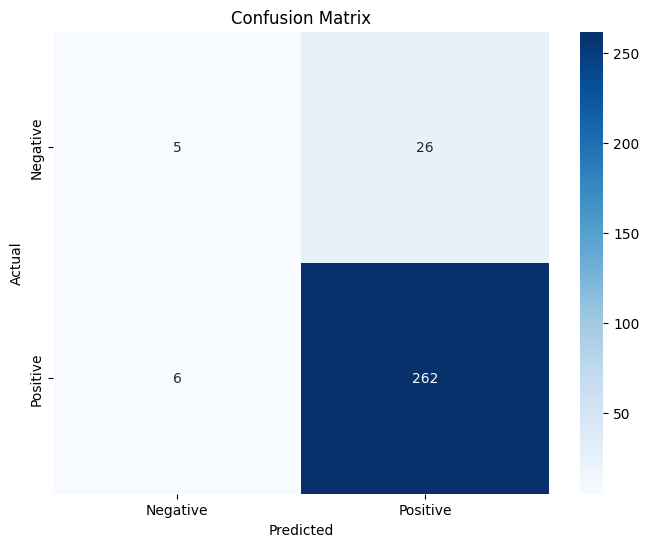

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mean: 4.39, Median: 5.00, Mode: 5.00
Std: 0.97, Variance: 0.94
Q1: 4.00, Q3: 5.00, Range: 4.50


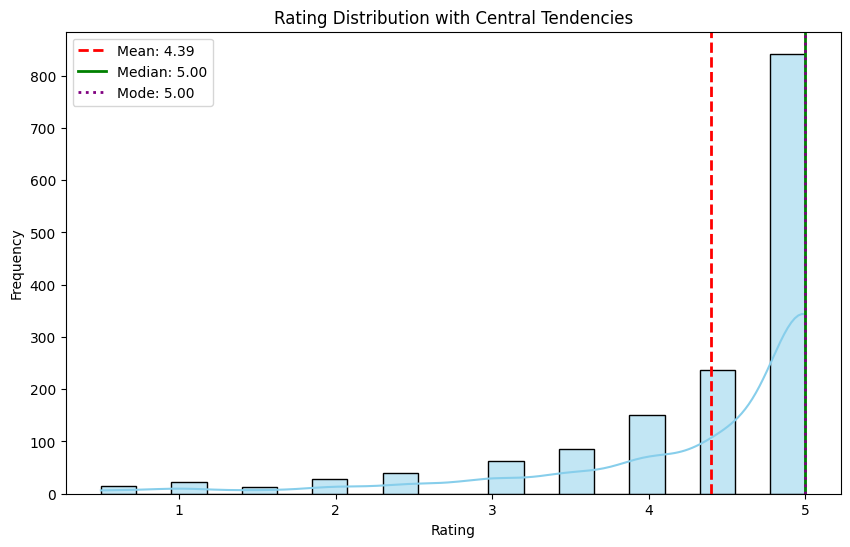

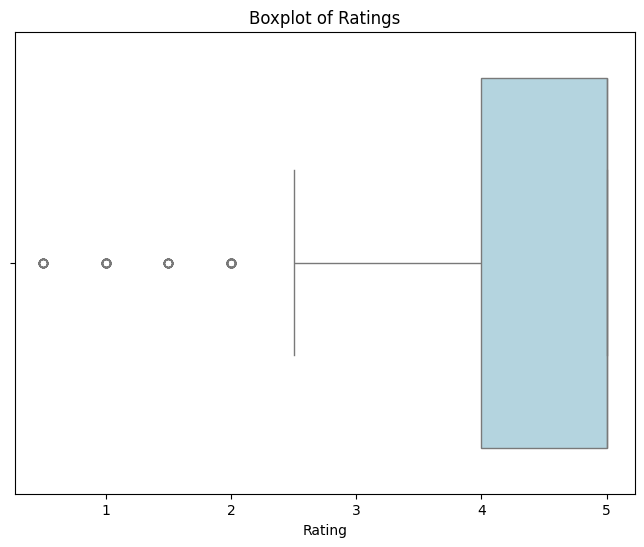

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dsotm_reviews.csv')
data.dropna(subset=['Rating'], inplace=True)

ratings = data['Rating']

mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]
std_rating = ratings.std()
variance_rating = ratings.var()
q1, q3 = ratings.quantile([0.25, 0.75])
data_range = ratings.max() - ratings.min()

print(f"Mean: {mean_rating:.2f}, Median: {median_rating:.2f}, Mode: {mode_rating:.2f}")
print(f"Std: {std_rating:.2f}, Variance: {variance_rating:.2f}")
print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, Range: {data_range:.2f}")

# -------------------------------

# -------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(ratings, kde=True, bins=20, color='skyblue')
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_rating:.2f}")
plt.axvline(median_rating, color='green', linestyle='-', linewidth=2, label=f"Median: {median_rating:.2f}")
plt.axvline(mode_rating, color='purple', linestyle=':', linewidth=2, label=f"Mode: {mode_rating:.2f}")
plt.title("Rating Distribution with Central Tendencies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------------------

# -------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x=ratings, color='lightblue')
plt.title("Boxplot of Ratings")
plt.xlabel("Rating")
plt.show()

Skewness: -1.98969797211174
Kurtosis: 3.713049530457649


<ipython-input-22-ec566f4f0f27>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='pastel')


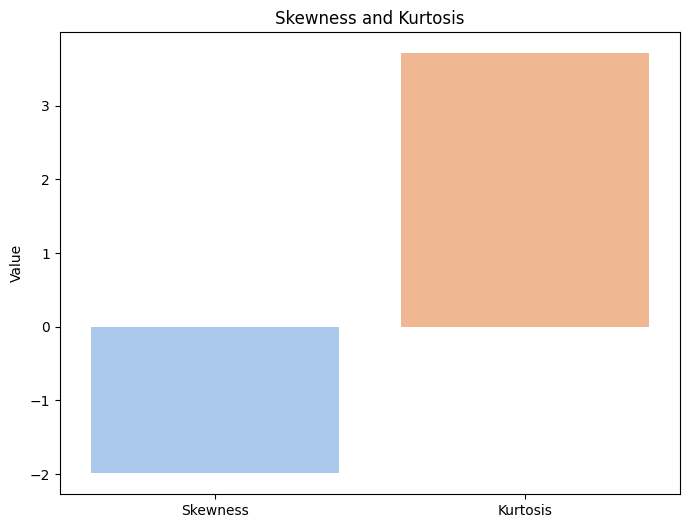

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


skewness_val = skew(ratings)
kurtosis_val = kurtosis(ratings)

print("Skewness:", skewness_val)
print("Kurtosis:", kurtosis_val)


metrics = ['Skewness', 'Kurtosis']
values = [skewness_val, kurtosis_val]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='pastel')
plt.title("Skewness and Kurtosis")
plt.ylabel("Value")
plt.show()

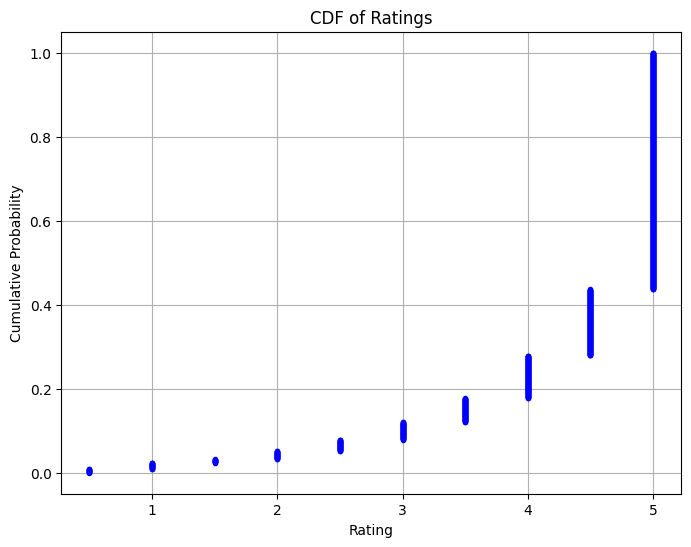

In [ ]:
sorted_ratings = np.sort(ratings)
cdf = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings)

plt.figure(figsize=(8, 6))
plt.plot(sorted_ratings, cdf, marker=".", linestyle="none", color="blue")
plt.xlabel("Rating")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Ratings")
plt.grid(True)
plt.show()

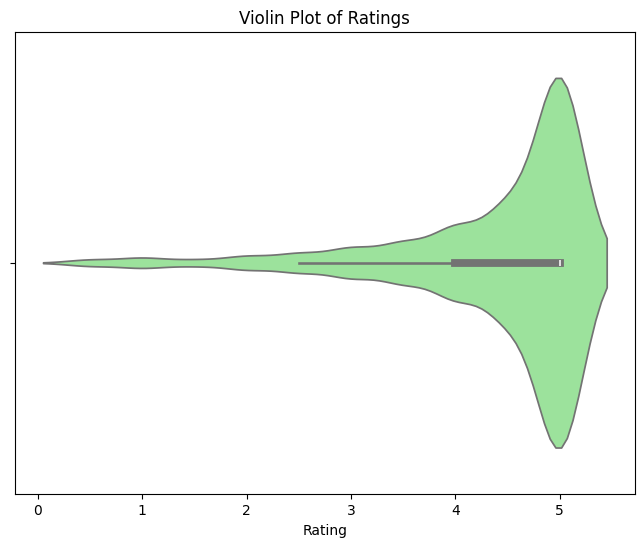

<ipython-input-25-a6956335b9b4>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ratings, shade=True, color='coral')


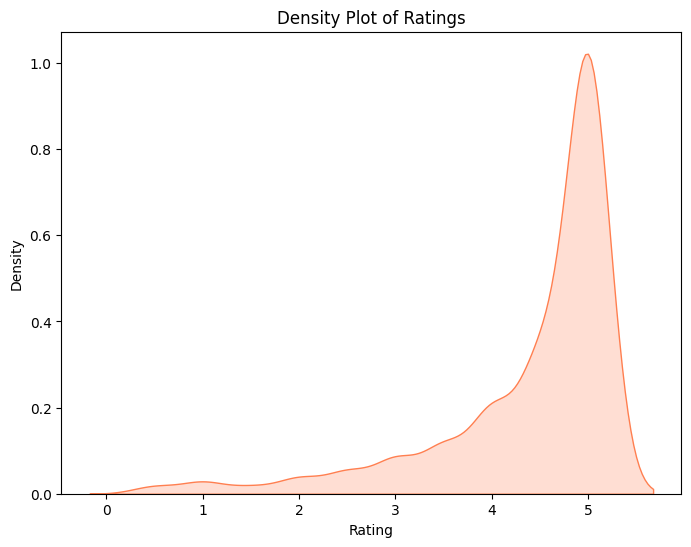

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=ratings, color='lightgreen')
plt.title("Violin Plot of Ratings")
plt.xlabel("Rating")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(ratings, shade=True, color='coral')
plt.title("Density Plot of Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

# 5 Different ways to improve the baseline model

Accuracy: 0.6956521739130435
F1 Score: 0.8108108108108109
Recall: 0.7276119402985075
              precision    recall  f1-score   support

           0       0.15      0.42      0.22        31
           1       0.92      0.73      0.81       268

    accuracy                           0.70       299
   macro avg       0.53      0.57      0.52       299
weighted avg       0.84      0.70      0.75       299



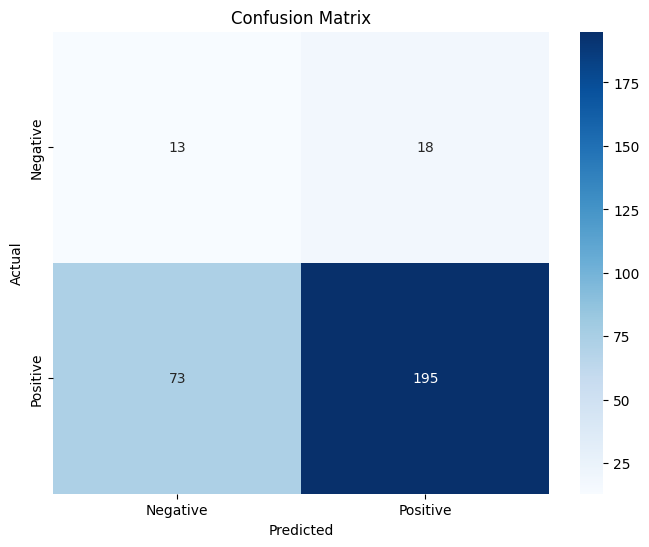

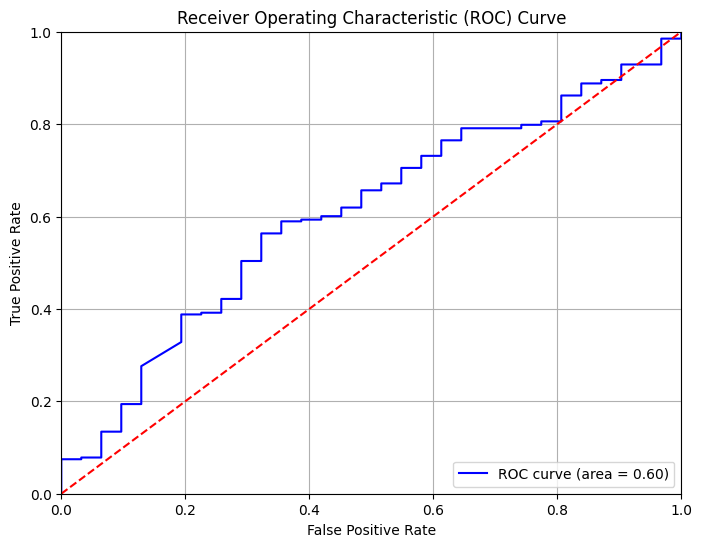

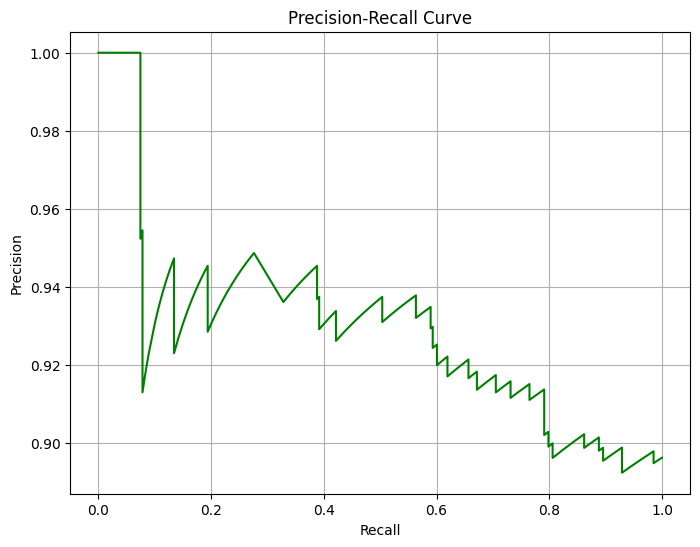

In [ ]:
# 1 Word embedding fusion: using TF-IDF and GloVe word embeddings, and then using logistic regression (worse results)（should use with multi-label）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = vectorizer.fit_transform(reviews).toarray()


glove_model = load_glove_model('glove.6B.100d.txt')


def vectorize_reviews(reviews, vectorizer, glove_model):
    tfidf_weights = vectorizer.transform(reviews).toarray()
    vectors = []
    for i, review in enumerate(reviews):
        words = review.split()
        weighted_vector = np.zeros(100)
        total_weight = 0
        for word in words:
            if word in glove_model:
                weight = tfidf_weights[i][vectorizer.vocabulary_.get(word, 0)]
                weighted_vector += weight * glove_model[word]
                total_weight += weight
        if total_weight > 0:
            weighted_vector /= total_weight  # 归一化
        vectors.append(weighted_vector)
    return np.array(vectors)

X = vectorize_reviews(reviews, vectorizer, glove_model)


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)


y_pred = logreg_model.predict(X_test)
y_scores = logreg_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

Accuracy: 0.8762541806020067
F1 Score: 0.9330922242314648
Recall: 0.9626865671641791
              precision    recall  f1-score   support

           0       0.29      0.13      0.18        31
           1       0.91      0.96      0.93       268

    accuracy                           0.88       299
   macro avg       0.60      0.55      0.56       299
weighted avg       0.84      0.88      0.85       299



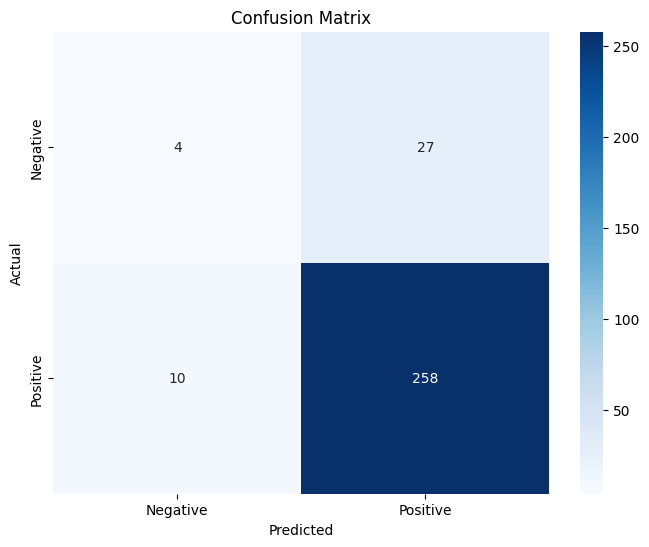

In [ ]:
# 2 Fusion of Logistic Regression, Support Vector Machine and Decision Tree using TF-IDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(reviews).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg_model = LogisticRegression(max_iter=1000)
svm_model = SVC(probability=True)  # Set probability=True to facilitate subsequent fusion
dt_model = DecisionTreeClassifier()

# Fusion Model
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('svm', svm_model),
    ('dt', dt_model)
], voting='soft')  # Can choose 'hard' or 'soft' voting

# Training the ensemble model
voting_model.fit(X_train_resampled, y_train_resampled)


y_pred = voting_model.predict(X_test)
y_scores = voting_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:13:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8695652173913043
F1 Score: 0.9281767955801105
Recall: 0.9402985074626866
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        31
           1       0.92      0.94      0.93       268

    accuracy                           0.87       299
   macro avg       0.62      0.60      0.61       299
weighted avg       0.86      0.87      0.86       299



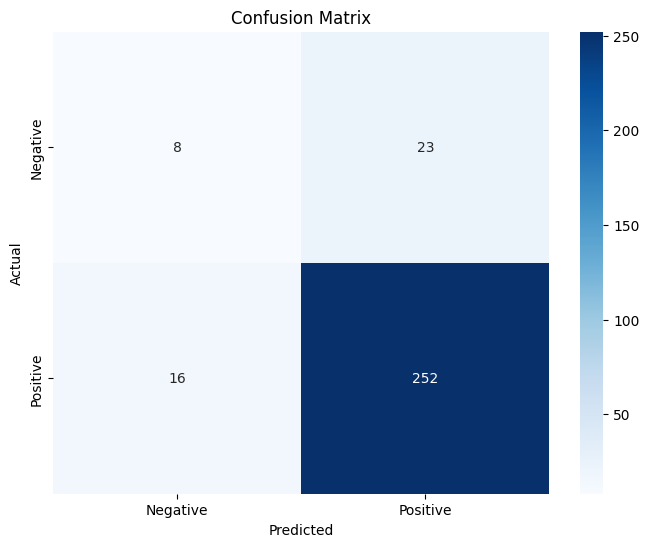

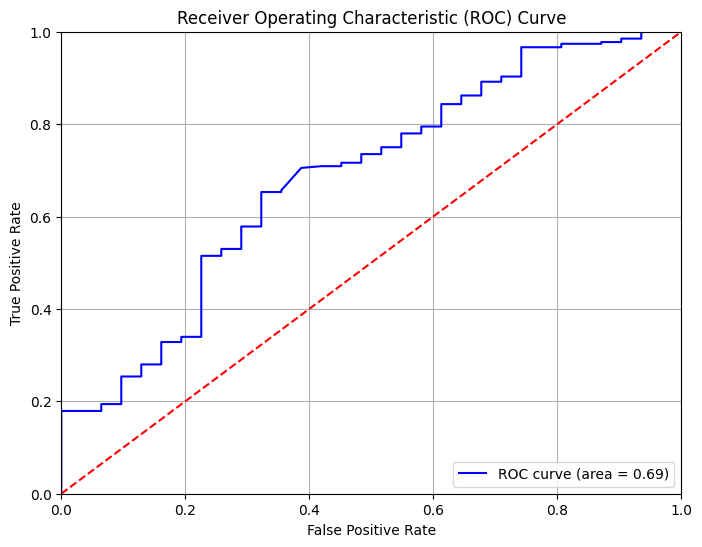

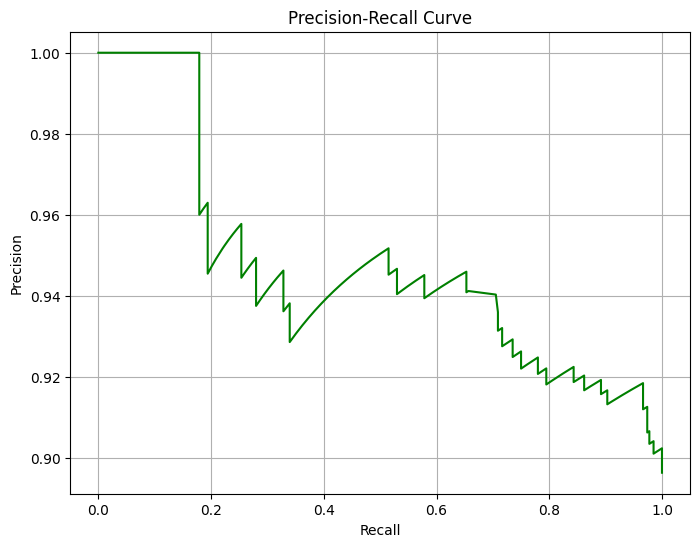

In [ ]:
# 3 TFIDF-XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


data = pd.read_csv('dsotm_reviews.csv')


data.dropna(subset=['Review', 'Rating'], inplace=True)


reviews = data['Review'].values
ratings = data['Rating'].values


labels = np.where(ratings > 3.0, 1, 0)


vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(reviews).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_model.predict(X_test)
y_scores = xgb_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()